# Covariance matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.covariance import shrunk_covariance

## Exercise 1: Inspect 2D data
함수 `generate_data()`는 평균과 공분산 행렬이 주어진 다변량 정규 분포(multivariate normal distribution)에서 데이터를 생성하는 함수입니다.

이 함수를 이용하여 데이터를 생성하고, 산점도와 히스토그램을 그려 데이터를 시각화합니다:

In [11]:
def generate_data(N_samples=300, cov=[[2, 1], [1, 2]], mean=[0, 5]):
    X = np.random.multivariate_normal(mean, cov, N_samples)
    return X

In [12]:
np.random.seed(42) # ensures replicable results
X = generate_data()

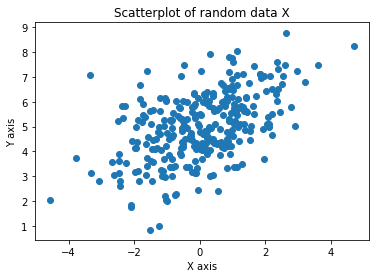

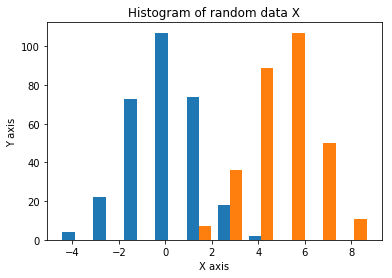

In [13]:
plt.title("Scatterplot of random data X")
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

plt.title("Histogram of random data X")
plt.hist(X)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

## Exercise 2: Covariance estimator for n-dimensional data

함수 `generate_covariance()`는 공분산 행렬을 샘플링하는 함수입니다. 

이 함수를 통해 샘플링 된 공분산 행렬을 가지고 `generate_data()`를 이용하여 데이터를 생성합니다:

In [14]:
def generate_covariance(D_features):
    tmp = np.random.randn(D_features, D_features)
    cov = np.dot(tmp, tmp.transpose()) 
    return cov

In [21]:
np.random.seed(42) # ensures replicable results
N_samples = 200
D_features = 100
cov_true = generate_covariance(D_features)

다음, 크기가 $(N_{samples} \times D_{features})$ 인 데이터 세트 $X$에 대하여 공분산 행렬을 계산하는 `estimate_covariance(X)`를 구현합니다.

In [22]:
X = generate_data(N_samples, cov_true, np.zeros(D_features))

def estimate_covariance(X):
    mean = np.mean(X, axis=0)
    N_samples = len(X[:,0])
    X = X - mean
    tmp = np.dot(np.transpose(X), X)
    cov = 1 / (N_samples - 1) * tmp
    return cov

est = estimate_covariance(X)
print(est)

[[ 84.95506649 -14.39865944  24.88096653 ...  -3.74564609   5.24720775
   -4.97908326]
 [-14.39865944  86.90258294 -11.45957863 ...  20.72487011   4.57037567
   -1.35662158]
 [ 24.88096653 -11.45957863 118.79270623 ... -16.40598973   8.97224885
   -4.57837936]
 ...
 [ -3.74564609  20.72487011 -16.40598973 ...  90.76048054   3.45576411
    3.99155135]
 [  5.24720775   4.57037567   8.97224885 ...   3.45576411  85.31254506
   14.75321733]
 [ -4.97908326  -1.35662158  -4.57837936 ...   3.99155135  14.75321733
  117.89788772]]


추정된 공분산 행렬 `est`를 **Numpy** 패키지의 해당 내장 함수인 `np.cov()` 및 실제 공분산 `cov_true`와 비교합니다. 이를 시각화하여 살펴보겠습니다.

Text(0.5,1,'True covariance matrix')

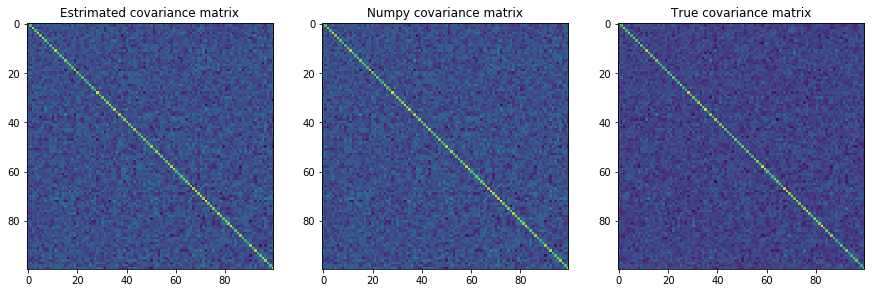

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(est)
axes[0].set_title("Estrimated covariance matrix")
axes[1].imshow(np.cov(X.T))
axes[1].set_title("Numpy covariance matrix")
axes[2].imshow(cov_true)
axes[2].set_title("True covariance matrix")

## Exercise 3: 다양한 표본 크기에 대한 고유값 스펙트럼

고정된 수의 feature $D_{features} = 100$ 가 주어진 경우, 샘플 수 $N_{samples}$ 가 변화함에 따라 eigenvalue가 어떻게 변화하는지 살펴보겠습니다.


In [27]:
np.random.seed(42) # ensures replicable results
D_features = 100
N_samples = [20, 50, 100, 300, 1000]
cov_true = generate_covariance(D_features)

우선, 생성된 샘플 $X$에서 공분산 행렬을 추정하고, 이 행렬의 고유값(eigenvalue)를 계산하여 정렬합니다. 다음, 고유값을 order/rank 에 따라 플롯합니다 (이를 eigen spectrum 이라 함).

위 과정을 주어진 샘플 크기 `N_samples = [20, 50, 100, 300, 1000]` 및 표시된 모든 스펙트럼에 대해 반복합니다. 이후, 실제 공분산 행렬에 대해서도 같은 과정을 진행한 뒤 비교해 보겠습니다.

/Users/Kimnayeong/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


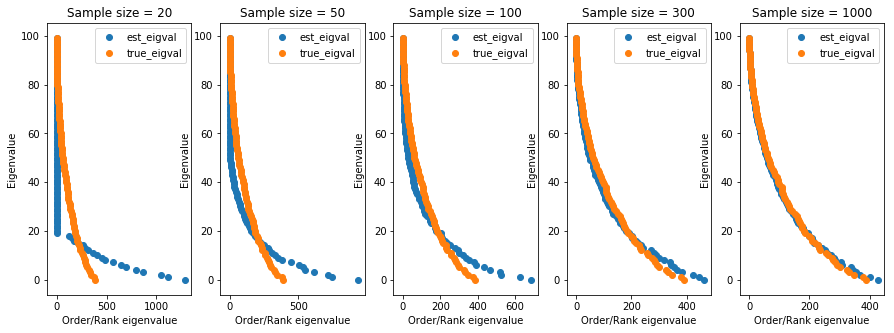

In [29]:
true_eigval, true_eigvec = np.linalg.eig(cov_true)
idx = true_eigval.argsort()[::-1]
true_eigval = true_eigval[idx]
true_eigvec = true_eigvec[:, idx]

fig, axes = plt.subplots(1, len(N_samples), figsize=(15,5))

for i, sample in enumerate(N_samples):
    X = generate_data(sample, cov_true, np.zeros(D_features))
    est = estimate_covariance(X)
    eigval, eigvec = np.linalg.eig(est)
    idx = eigval.argsort()[::-1]
    eigval = eigval[idx]
    eigvec = eigvec[:, idx]
    
    axes[i].scatter(eigval, np.arange(0, len(eigval)), label='est_eigval')
    axes[i].scatter(true_eigval, np.arange(0, len(true_eigval)), label='true_eigval')
    axes[i].legend()
    axes[i].set_xlabel("Order/Rank eigenvalue")
    axes[i].set_ylabel("Eigenvalue")
    axes[i].set_title("Sample size = " + str(sample))

고유값의 최대 추정치는 대부분 실제 값에 더 가까운 것으로 관찰됨으로 보아, 표본의 크기가 커질수록 추정된 고유값이 더 정확함을 알 수 있습니다.

이때 공분산 추정을 위해서는 반드시 $N_{samples} \geq D_{features}$ 을 만족해야 합니다. 만약 $N_{samples} < D_{feature}$ 인 경우, **shrinkage** 또는 **sparse inverce covariances**를 사용하여 이 문제를 해결할 수 있습니다. 
- shrinkage is a tool to improve estimation of covariance matrices in situations where the number of training samples is small compared to the number of features. In the small-samples situation, in which n_samples is on the order of n_features or smaller, sparse inverse covariance estimators tend to work better than shrunk covariance estimators. (출처: sklearn)

## Exercise 4 :  정규화를 통한 공분산 추정 개선

$N_{samples} > D_{features}$를 만족함에도 불구하고 고유값 추정치에서 시스템적 오류가 관찰될 경우, 추정된 스펙트럼이 실제 스펙트럼에 더 가깝게 근접하도록 개선하는 방안을 살펴보려 합니다. 그 중 하나는 shrinkage parameter를 이용하여 공분산 행렬의 정규화된 추정을 찾는 것입니다. 

구현 시 **"sklearn"** 라이브러리의 `shrunk_covariance()`함수를 사용하였습니다 [(here)](https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance)

In [33]:
def estimate_regularized_covariance(X, shrink_param=0.3):
    cov = np.cov(X.T)
    regularized_cov = shrunk_covariance(cov, shrink_param)
    return regularized_cov

In [34]:
np.random.seed(42) # ensures replicable results
N_samples = 120
cov_true = generate_covariance(D_features)
X = generate_data(N_samples, cov_true, np.zeros(D_features))

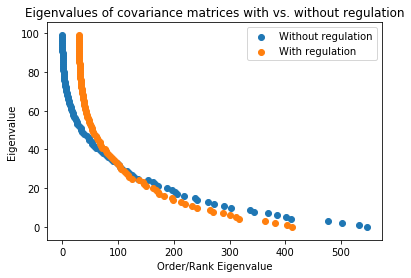

MSE of ture covariance matrix and empirical covariance matrix:  88.80201604011809
MSE of ture covariance matrix and regularized covariance matrix:  54.554899434537965


In [35]:
cov_without_reg = estimate_covariance(X)
cov_with_reg = estimate_regularized_covariance(X)

eigval, eigvec = np.linalg.eig(cov_without_reg)
reg_eigval, reg_eigvec = np.linalg.eig(cov_with_reg)

idx = eigval.argsort()[::-1]
eigval = eigval[idx]
eigvec = eigvec[:, idx]
idx = reg_eigval.argsort()[::-1]
reg_eigval = reg_eigval[idx]
reg_eigvec = reg_eigvec[:, idx]

mse_true = (np.square(cov_true - cov_without_reg)).mean(axis=None)
mse_true_reg = (np.square(cov_true - cov_with_reg)).mean(axis=None)

plt.scatter(eigval, np.arange(len(eigval)), label='Without regulation')
plt.scatter(reg_eigval, np.arange(len(reg_eigval)), label='With regulation')
plt.xlabel("Order/Rank Eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of covariance matrices with vs. without regulation")
plt.legend()
plt.show()

print("MSE of ture covariance matrix and empirical covariance matrix: ", mse_true)
print("MSE of ture covariance matrix and regularized covariance matrix: ", mse_true_reg)